In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importando a base e transformando a variavel resposta em numero, quando for Maligno será 1 e quando for Benigno será 0

In [2]:
base = pd.read_csv('dados/base.txt', sep=';', decimal=',')
base['diagnostico'] = base['diagnostico'].apply(lambda x: 1 if x == 'M' else 0)

## Feature Importance
Nessa etapa vamos entender qual a correlação linear entre as variveis e quais são mais importantes para o modelo fazer a previsão

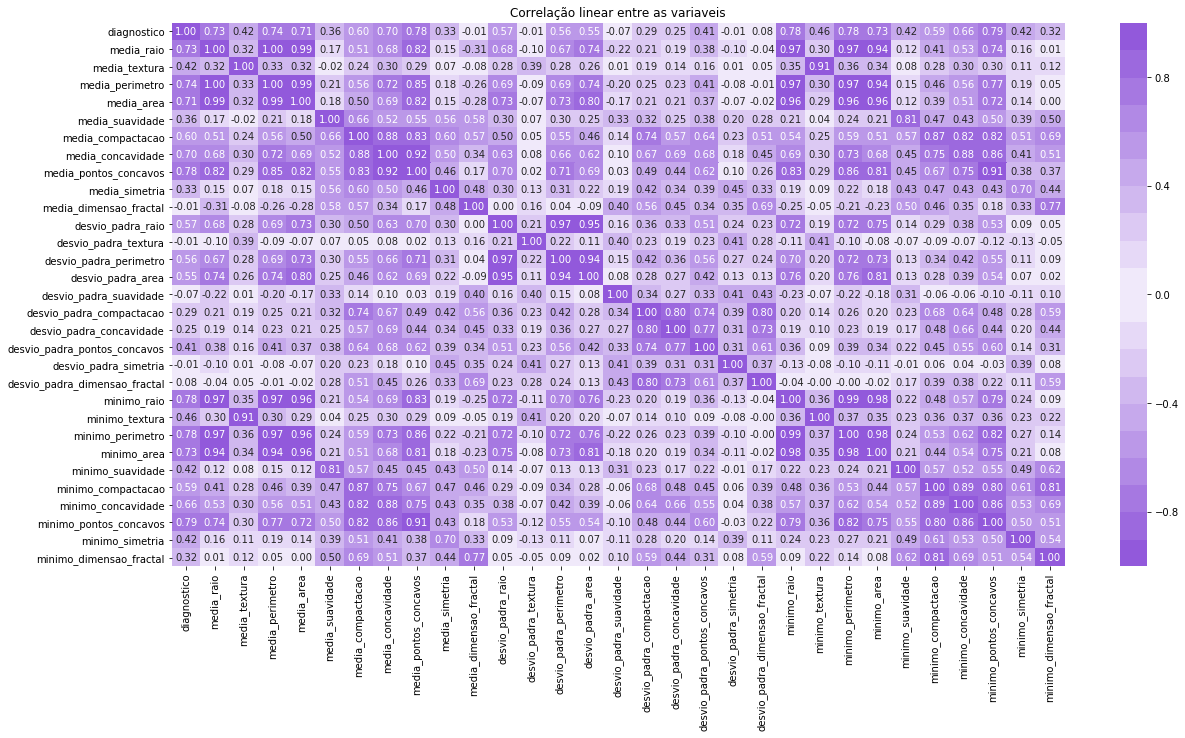

In [3]:
plt.figure(figsize=[20, 10])

plt.title('Correlação linear entre as variaveis')

sns.heatmap(
    base.drop(['ID'], axis=1).corr(),
    annot=True,
    fmt='.2f',
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(999, 999, n=20))

plt.show()

In [4]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(base.drop(['ID', 'diagnostico'], axis=1), base['diagnostico'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [5]:
pd.DataFrame({
    'features': base.drop(['ID', 'diagnostico'], axis=1).columns,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)

,features,importance
27,minimo_pontos_concavos,0.208854
22,minimo_perimetro,0.193273
10,desvio_padra_raio,0.107454
2,media_perimetro,0.083015
5,media_compactacao,0.080751
3,media_area,0.072196
7,media_pontos_concavos,0.044564
20,minimo_raio,0.035156
26,minimo_concavidade,0.026679
24,minimo_suavidade,0.019917


Irei remover as variaveis que possuem uma correlação menor que 0,7 e com uma importancia menor que 10%

In [6]:
base = base[['ID', 'diagnostico', 'media_perimetro', 'minimo_perimetro', 'minimo_area', 'minimo_pontos_concavos']]

Vou criar uma função que a partir de um modelo parametrizado, imprime a matriz de confusão e as metricas de acuracia, precisão e recall

In [7]:
def valida_modelo(clf, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
    
    clf = clf.fit(X_train, y_train)
    
    plt.title('Matriz de confusão')
    sns.heatmap(confusion_matrix(clf.predict(X_test), y_test), annot=True, fmt='.2f')
    plt.show()
    
    accuracy = accuracy_score(y_test, clf.predict(X_test))
    precision = precision_score(y_test, clf.predict(X_test))
    recall = recall_score(y_test, clf.predict(X_test))
    
    print('Acuracia: %.2f' % accuracy)
    print('Precisão: %.2f' % precision)
    print('Recall: %.2f' % recall)

Treinando com um modelo de Naive Bayes

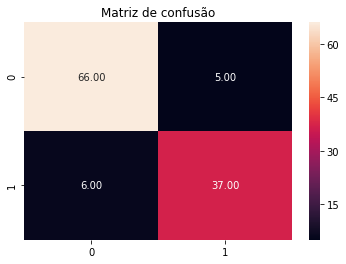

Acuracia: 0.90
Precisão: 0.86
Recall: 0.88


In [8]:
valida_modelo(
    GaussianNB(),
    base.drop(['ID', 'diagnostico'], axis=1),
    base['diagnostico'])

Treinando um modelo de classificação Regressão Logistica

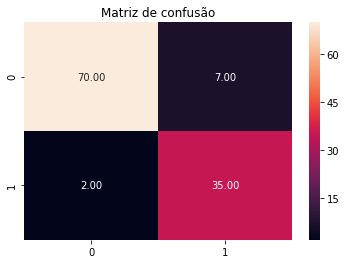

Acuracia: 0.92
Precisão: 0.95
Recall: 0.83


In [9]:
valida_modelo(
    LogisticRegression(solver='liblinear'),
    base.drop(['ID', 'diagnostico'], axis=1),
    base['diagnostico'])